# EigenFaces (PCA) on LFW Dataset

In [ ]:
# !pip install opencv-python
# !apt update
# !apt install ffmpeg libsm6 libxext6  -y

In [23]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [24]:
def plot_gallery(images, h, w, n_row = 5, n_col = 5): 
    plt.figure(figsize =(1.8 * n_col, 2.4 * n_row)) 
    plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35) 
    for i in range(n_row * n_col): 
        plt.subplot(n_row, n_col, i + 1) 
        plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray) 
        plt.xticks(()) 
        plt.yticks(()) 

(1140, 1850)


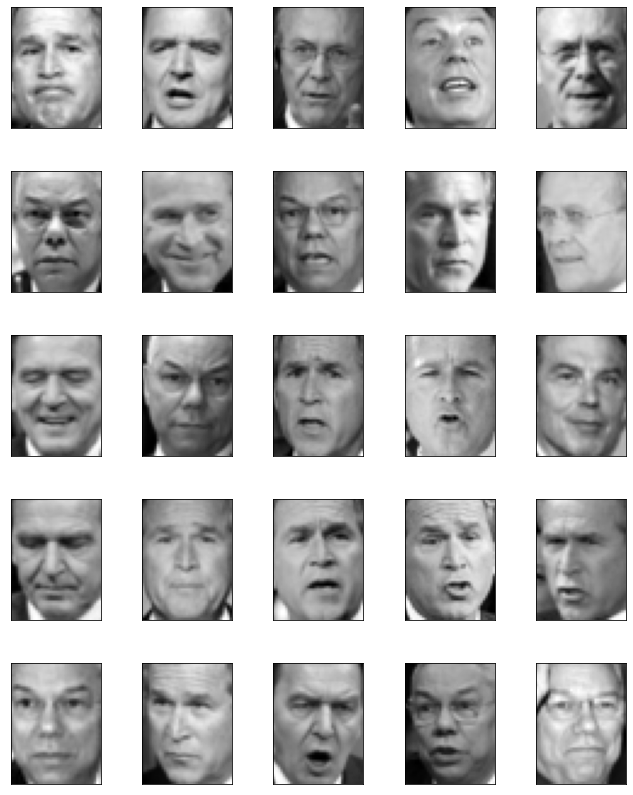

In [25]:
lfw_dataset = fetch_lfw_people(min_faces_per_person=100, resize=0.4)
_, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
print(X.shape)
plot_gallery(X,h,w)

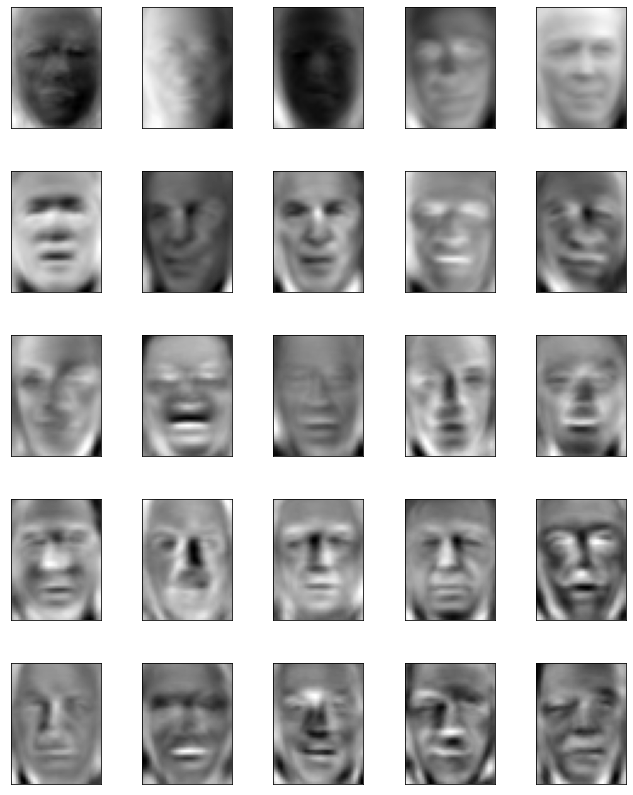

In [26]:
n_components = 25
pca = PCA(n_components=n_components, whiten=True).fit(X)
plot_gallery(pca.components_,h,w)

# EigenFaces on My Face

(50, 37)
(1850,)


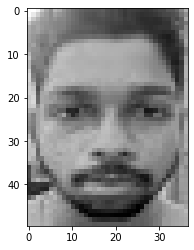

In [17]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

im = cv2.imread('test2.jpg',0)

plt.imshow(im,cmap='gray')
print(im.shape)
print(im.flatten().shape)

(1, 25)
(50, 37)


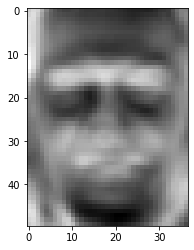

In [22]:
im_transform = pca.transform(im.flatten().reshape((1,1850)))
print(im_transform.shape)
im_recons = np.matmul(pca.components_.T,test.T)
im_recons = im_recons.reshape(50,37)
print(im_recons.shape)
plt.imshow(im_recons, cmap='gray')

# PCA on Celebrity Faces

In [ ]:
#!wget http://conradsanderson.id.au/lfwcrop/lfwcrop_grey.zip
#!unzip lfwcrop_grey.zip

In [91]:
from sklearn.decomposition import PCA
from matplotlib.pyplot import imread
import glob
import numpy as np


images = [imread(path) for path in glob.glob("lfwcrop_grey/faces/*.pgm")]
images = np.asarray(images[1:1001])
n_samples, h, w = images.shape

images = images.reshape(n_samples, h*w)

print(images.shape)

# pca=PCA(n_components=25, whiten=True)
# pca.fit(images)

(1000, 4096)


In [ ]:
plot_gallery(images, h, w)

In [ ]:
plot_gallery(pca.components_,h,w)

In [ ]:
pca.components_.shape

In [ ]:
reconstruct = pca.inverse_transform(pca.fit_transform(images))
plot_gallery(reconstruct, h, w) 